# Logistic Regression

In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
%matplotlib inline

In [2]:
#Perform Exploratory Data Analysis in just one line of code
pandas_profiling.ProfileReport(pd.read_csv('Titanic_Dataset.csv'))

In [3]:
#Import Titanic Dataset
titanic_data = pd.read_csv('Titanic_Dataset.csv')

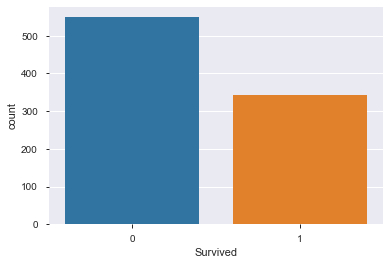

In [4]:
#Count number of passenger who survived and NOT survived: 0 = Not Survived, 1 = Survived
sns.countplot(x='Survived',data=titanic_data)

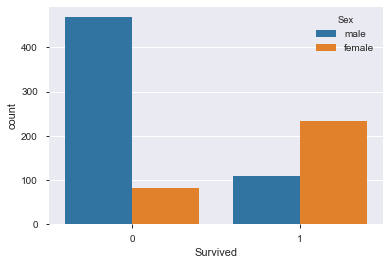

In [5]:
#Count number of males and females who survived and NOT survived: 0 = Not Survived, 1 = Survived
sns.countplot(x='Survived',hue='Sex',data=titanic_data)

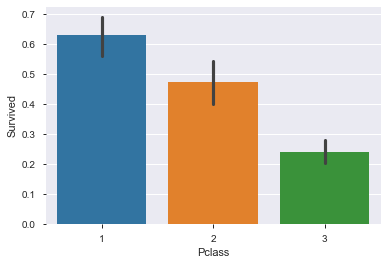

In [6]:
#Count which class passengers survived most
sns.barplot(x='Pclass', y='Survived', data=titanic_data)

In [7]:
#Verify missing values in each column
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#Check data types of each column and hence finding out which columns are categorical in nature
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


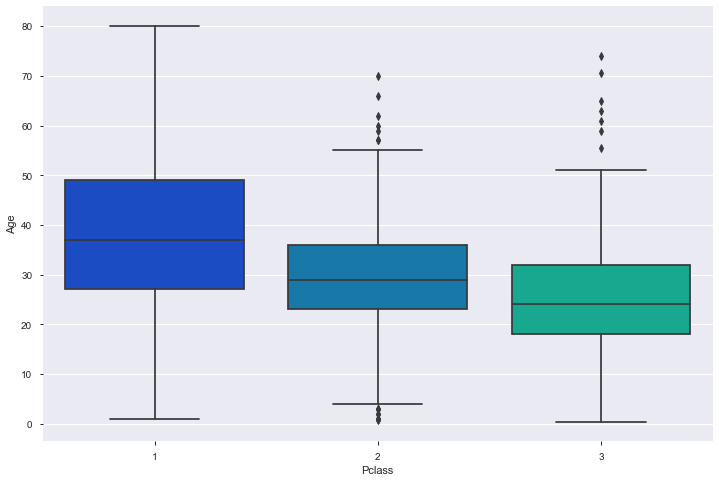

In [9]:
#Visualize and find out average age by class
plt.figure(figsize=(12, 8))
sns.boxplot(x='Pclass',y='Age',data=titanic_data,palette='winter')

In [10]:
#Function to impute missing values in age column based on class
def imput_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        return int(titanic_data[titanic_data["Pclass"] == Pclass]["Age"].mean())
    else:
        return Age

In [11]:
#Impute missing values in age column by average age
titanic_data["Age"] = titanic_data[["Age", "Pclass"]].apply(imput_age,axis=1)

In [12]:
#Drop Cabin column
titanic_data.drop("Cabin",inplace=True,axis=1)

In [13]:
#Impute Embarked missing values with most common values
most_common_value = 'S'

for data in titanic_data:
    titanic_data['Embarked'] = titanic_data['Embarked'].fillna(most_common_value)

In [14]:
#Check if there are any missing values left
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
#Convert categorical variables into Dummy variables
sex = pd.get_dummies(titanic_data['Sex'],drop_first=True)
embark = pd.get_dummies(titanic_data['Embarked'],drop_first=True)
pclass = pd.get_dummies(titanic_data["Pclass"],drop_first=True)

In [16]:
#Drop irrelevant columns
titanic_data.drop(['PassengerId','Sex','Embarked','Name','Ticket','Pclass'],axis=1,inplace=True)

In [17]:
#Validate the columns and data
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [18]:
#Concatenate the dummy variables, created above
titanic_data = pd.concat([titanic_data,sex,embark,pclass],axis=1)
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [19]:
#Create Feature variable X and Target variable y
X = titanic_data.drop("Survived",axis=1)
y = titanic_data['Survived']

In [20]:
#Split the data into training set (70%) and test set (30%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

In [21]:
#Fit the logistic Regression Model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=50)
logmodel.fit(X_train,y_train)

#Predict the value for new, unseen data
pred = logmodel.predict(X_test)
pred

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [22]:
#Check the values of first record correspoding to the first vector value given above.
X_test.head(1)

,Age,SibSp,Parch,Fare,male,Q,S,2,3
558,39.0,1,1,79.65,0,0,1,0,0


In [23]:
#Calculate Precision, Recall and F1-Score
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       162
           1       0.80      0.66      0.72       106

    accuracy                           0.80       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.80      0.80      0.79       268



In [24]:
#Generate confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,pred)
conf_mat

array([[144,  18],
       [ 36,  70]], dtype=int64)

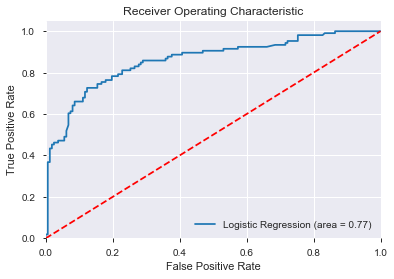

In [25]:
#Generate AUC-ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Support Vector Machine

In [26]:
#Fit the Support Vector Machine Model
from sklearn.svm import SVC
svcmodel = SVC(kernel='linear', random_state=50, probability=True)
svcmodel.fit(X_train,y_train)

#Predict the value for new, unseen data
svc_pred = svcmodel.predict(X_test)
svc_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [27]:
#Check the values of first record correspoding to the first vector value given above.
X_test.head(1)

,Age,SibSp,Parch,Fare,male,Q,S,2,3
558,39.0,1,1,79.65,0,0,1,0,0


In [28]:
#Calculate Precision, Recall and F1-Score
from sklearn.metrics import classification_report
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       162
           1       0.75      0.69      0.72       106

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268



In [29]:
#Generate confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat_svc = confusion_matrix(y_test,svc_pred)
conf_mat_svc

array([[138,  24],
       [ 33,  73]], dtype=int64)

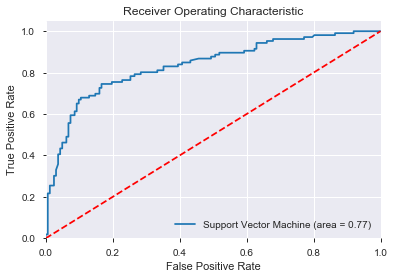

In [30]:
#Generate AUC-ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
svc_roc_auc = roc_auc_score(y_test, svcmodel.predict(X_test))
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, svcmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr_svc, tpr_svc, label='Support Vector Machine (area = %0.2f)' % svc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()